# Atividade 4 EQ024: Tecnologia da Fluidização

## Aluno: João Eduardo Levandoski

# Propriedades

**Fluido:**

 - Tipo de gás: Ar comprimido         
     - $\rho$$_g$ (kg.m$^{-3}$): 1,116 @ T ($^o$C): 43 +/- 2           
     - $\mu$$_g$ (kg.m$^{-1}$.s$^{-1}$): 18 x 10$^{-6}$ @ T ($^o$C): 22    
    
    
**Partículas:**

 - Classificação de Gerald: D          
 - Modelo de distribuição escolhido: RRB  
     - $\rho$$_{part}$ (kg/m$³$): 1159 - 1217  
     - $\epsilon$$_{part}$(%): 52,55 - 54,22       
     - $\phi$$_{part}$: 0,34 - 0,37        
     - d$_{ps}$($\mu$m): 3586,68      


### Início dos dados para teste

In [106]:
d_sauter = 160*10**-6                          
densi_gas = 3.6                 
temp = 43                   
densi_part = 1500 #Aparente                   
# densi_part = 1217 #Real                   
g = 9.8                  
visc = 20*10**-6                 
esf = 0.35                  

In [107]:
D_c = 4
Lmf = 2
emf = 0.48 # Tannous 
U = 0.4 #7.63 - 8.24 #???

### Final dos dados para teste

In [108]:
d_sauter = 3586.68*10**-6
densi_gas = 1.116
temp = 43
### densi_part = 557.10 #Aparente
densi_part = 1217 #Real
g = 9.81
visc = 18*10**-6
esf = 0.35

# Características do Equipamento/leito

**Equipamento:**

 - Diâmetro: 250 mm
 - Altura: 800 mm 
 
 
**Leito:**

 - Altura: 187 - 203 mm
 

In [109]:
D_c = 0.25
Lmf = 1.13*0.203
emf = 0.581893 # Fatah
U = 2*(1.17) #7.63 - 8.24 #??

# Etapa 1              
## Determinar  a  queda  de  pressão  mínima  permitida  através  do  distribuido

In [110]:
Pb = (1 - emf)*(densi_part - densi_gas)*g*Lmf
Pb

1143.9922200333008

In [111]:
Pd = 0.3*Pb
Pd

343.1976660099902

# Etapa 2
## Determinando o coeficiente  do orifício

In [112]:
Re = D_c*U*densi_gas/visc
Re

36270.0

In [113]:
Cd_or = 0.6  # Pois está acima Re > 3000
Cd_or

0.6

# Etapa 3
## Calculo da  Uor

In [114]:
Uor = Cd_or*(2*Pd/densi_gas)**(1/2)
Uor

14.880115894666389

In [115]:
pi = 3.14
Area = pi*(D_c/2)**(2)
Area

0.0490625

In [116]:
frac = U/Uor
frac*100

15.725683970235385

In [117]:
print('dor\t\tNor\t\t\tNúmero de furos')
for dor in [0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005]:
    Nor = (U/((pi/4)*(dor**2)*Uor))
    print(f'{dor:.3}\t\t{Nor:8.7}\t\t{Nor*Area:8.7}')

dor		Nor			Número de furos
0.001		200327.2		9828.552
0.0015		 89034.3		4368.246
0.002		 50081.8		2457.138
0.0025		32052.35		1572.568
0.003		22258.58		1092.061
0.0035		16353.24		802.3308
0.004		12520.45		614.2845
0.0045		  9892.7		485.3606
0.005		8013.087		393.1421


In [126]:
# dor = 0.0025
# dor = 0.003
dor = 0.0045
# dor = 0.002 # Exemplo
dor

0.0045

In [127]:
# Nor = 32000
# Nor = 22250
Nor = 9900
# Nor = 4200 # Exemplo
Nor

9900

# Etapa 4
## Espaçamento entre os centros dos furos (lado triangular)

In [130]:
dis_or = (2/(Nor*3**(1/2)))**(1/2)
dis_or*1000

10.799834166231731

# Etapa 5
## Determinar comprimento do jato

In [129]:
Lj = dor*5.2*((((dor*densi_gas)/(densi_part*d_sauter))**0.3)*(1.3*((Uor/(g*dor))**0.2) - 1))
Lj*100

0.9720551127703471

$U = \frac{\pi}{4} d_{or}^2 U_{or} N_{or}$

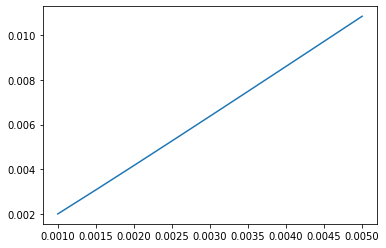

In [122]:
import matplotlib.pyplot as plt
L = []
d = []
for dor in [0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005]:
    d.append(dor)
    L.append(dor*5.2*((((dor*densi_gas)/(densi_part*d_sauter))**0.3)*(1.3*((Uor/(g*dor))**0.2) - 1)))

    
plt.plot(d, L)


In [123]:
d

[0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005]

In [124]:
L

[0.0020110804991990915,
 0.003084073149191082,
 0.004172250664029601,
 0.0052705396904166426,
 0.006376073171036106,
 0.007487028023326959,
 0.008602154762124824,
 0.00972055112770347,
 0.01084153997049865]

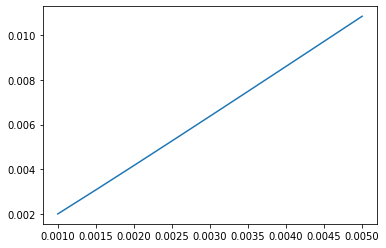

In [125]:
plt.plot(d, L)